In [2]:
import os
os.listdir()


['amazon_sentiment_analysis.ipynb',
 'Amazon_Sales_Dataset.csv',
 '.ipynb_checkpoints']

In [3]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('/Users/yuanmingmo/Documents/BAN200/Amazon_Sales_Dataset.csv')
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
# Check column names to find relevant review columns
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
import pandas as pd
import re

# Combine review_title and review_content into one column
df['full_review'] = df['review_title'].fillna('') + ' ' + df['review_content'].fillna('')

# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Apply cleaning
df['cleaned_review'] = df['full_review'].apply(clean_text)

# Show first few cleaned reviews
df[['cleaned_review']].head()


,cleaned_review
0,satisfiedcharging is really fastvalue for mone...
1,a good braided cable for your type c devicegoo...
2,good speed for earlier versionsgood productwor...
3,good productgood onenicereally nice productver...
4,as good as originaldecentgood one for secondar...


In [6]:
from textblob import TextBlob

# Function to get polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function
df['textblob_sentiment'] = df['cleaned_review'].apply(get_sentiment)

# View results
df[['cleaned_review', 'textblob_sentiment']].head()


,cleaned_review,textblob_sentiment
0,satisfiedcharging is really fastvalue for mone...,0.473958
1,a good braided cable for your type c devicegoo...,0.294589
2,good speed for earlier versionsgood productwor...,0.533333
3,good productgood onenicereally nice productver...,0.331795
4,as good as originaldecentgood one for secondar...,0.260013


In [7]:
# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['textblob_sentiment_label'] = df['textblob_sentiment'].apply(classify_sentiment)

# View results
df[['cleaned_review', 'textblob_sentiment', 'textblob_sentiment_label']].head()


,cleaned_review,textblob_sentiment,textblob_sentiment_label
0,satisfiedcharging is really fastvalue for mone...,0.473958,Positive
1,a good braided cable for your type c devicegoo...,0.294589,Positive
2,good speed for earlier versionsgood productwor...,0.533333,Positive
3,good productgood onenicereally nice productver...,0.331795,Positive
4,as good as originaldecentgood one for secondar...,0.260013,Positive


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to get compound sentiment scores
df['vader_sentiment'] = df['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify VADER sentiment
df['vader_sentiment_label'] = df['vader_sentiment'].apply(classify_sentiment)

# View results
df[['cleaned_review', 'textblob_sentiment_label', 'vader_sentiment', 'vader_sentiment_label']].head()


,cleaned_review,textblob_sentiment_label,vader_sentiment,vader_sentiment_label
0,satisfiedcharging is really fastvalue for mone...,Positive,0.9458,Positive
1,a good braided cable for your type c devicegoo...,Positive,0.9922,Positive
2,good speed for earlier versionsgood productwor...,Positive,0.9298,Positive
3,good productgood onenicereally nice productver...,Positive,0.9854,Positive
4,as good as originaldecentgood one for secondar...,Positive,0.9952,Positive


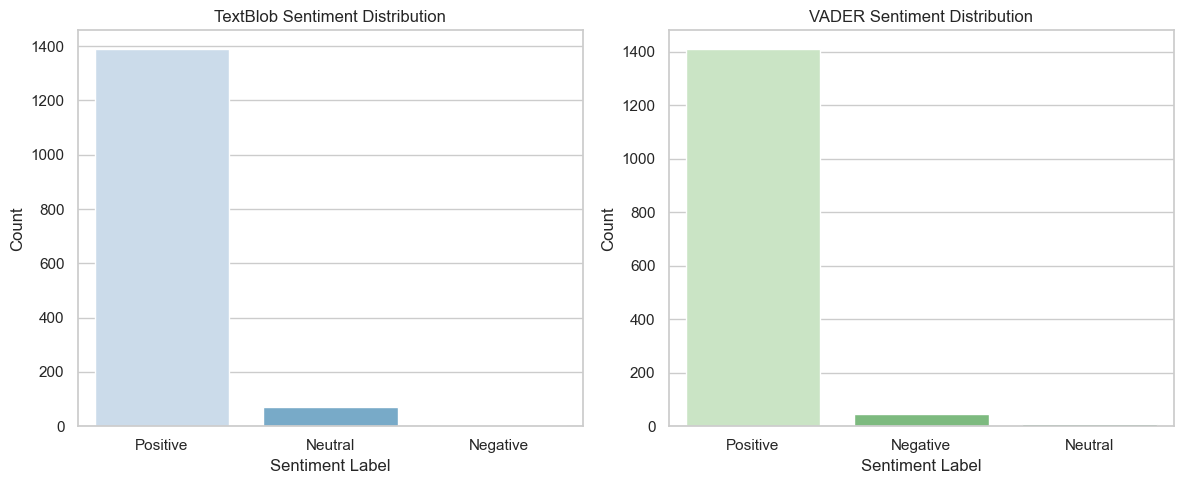

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Plot sentiment label counts from TextBlob
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='textblob_sentiment_label', hue='textblob_sentiment_label',
              palette='Blues', legend=False)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Plot sentiment label counts from VADER
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='vader_sentiment_label', hue='vader_sentiment_label',
              palette='Greens', legend=False)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [10]:
# Total reviews
total_reviews = len(df)

# Sentiment distribution
textblob_counts = df['textblob_sentiment_label'].value_counts()
vader_counts = df['vader_sentiment_label'].value_counts()

# Agreement between TextBlob and VADER
agreement = (df['textblob_sentiment_label'] == df['vader_sentiment_label']).sum()
agreement_percent = (agreement / total_reviews) * 100

# Print summary
print("📌 Total Reviews:", total_reviews)
print("\n TextBlob Sentiment Counts:")
print(textblob_counts)
print("\n VADER Sentiment Counts:")
print(vader_counts)
print(f"\n Agreement between TextBlob and VADER: {agreement} out of {total_reviews} ({agreement_percent:.2f}%)")


📌 Total Reviews: 1465

 TextBlob Sentiment Counts:
textblob_sentiment_label
Positive    1389
Neutral       72
Negative       4
Name: count, dtype: int64

 VADER Sentiment Counts:
vader_sentiment_label
Positive    1409
Negative      46
Neutral       10
Name: count, dtype: int64

 Agreement between TextBlob and VADER: 1366 out of 1465 (93.24%)
